In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

rawdata = pd.read_csv('https://raw.githubusercontent.com/yuezheli/BankChurnerPred/main/BankChurners.csv', header = 0)


# label existing customers as 0
rawdata.replace('Existing Customer', 0, regex=True, inplace = True)
# label attrited customers as 1
rawdata.replace('Attrited Customer', 1, regex=True, inplace = True)


# drop unnecessary categorical variables

rawdata.drop(['CLIENTNUM', 'Education_Level', 'Marital_Status', 'Income_Category',
              'Card_Category'], axis = 1, inplace = True)

# binary encode of gender
rawdata.replace('M', 0, regex=True, inplace = True) # male = 0
rawdata.replace('F', 1, regex=True, inplace = True) # female = 0

rawdata.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# prepare training and testing datasets

attrition_label = rawdata['Attrition_Flag']
attrition_data = rawdata.drop(['Attrition_Flag'], axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attrition_data, attrition_label, test_size=0.2,random_state=109) 

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')


rf.fit(X_train, y_train);

y_pred = rf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) # much less false positive
print("Recall:",metrics.recall_score(y_test, y_pred)) # too many false negative

Accuracy: 0.9210266535044422
Precision: 0.8721461187214612
Recall: 0.5913312693498453


In [11]:
# drop more data to a state that is comparable to svm data to compare results

attrition_label = rawdata['Attrition_Flag']
attrition_data2 = rawdata.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count','Months_on_book', 
                               'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'], axis = 1)


X_train2, X_test2, y_train, y_test = train_test_split(attrition_data2, attrition_label, test_size=0.2,random_state=109) 

rf2 = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')


rf2.fit(X_train2, y_train);

y_pred2 = rf2.predict(X_test2)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2)) 
print("Recall:",metrics.recall_score(y_test, y_pred2)) 
# limited changes in precision, recall, and accuarcy, suggesting those varaible are not important after all

Accuracy: 0.9200394866732478
Precision: 0.8368200836820083
Recall: 0.6191950464396285


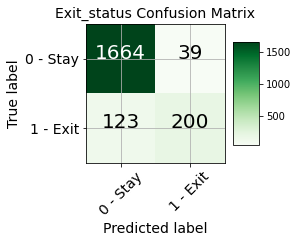

In [20]:
# plot confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 14)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 14)
    plt.xlabel('Predicted label', size = 14)


plot_confusion_matrix(confusion_matrix(y_test, y_pred2), classes = ['0 - Stay', '1 - Exit'],
title = 'Exit_status Confusion Matrix')


In [29]:
# add visualization to the random forest tree

estimator = rf2.estimators_[5]


from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)


